# Week 9

**BUSN 32100 Data Analysis with R and Python**

**Nov 22,23 2019**

In [ ]:
#Hikaru Sugimori. Worked with Arvind Bhaskar


## Contents

- [Week 9 Group Lab](#Week-9-Group-Lab)
  - [The index](#The-index) 
  - [Combine Datasets](#Combining-datasets)
  - [Groupby](#Split-Apply-Combine) 


## The index

Every Series or DataFrame has an index

We told you that the index was the “row labels” for the data

This is true, but an index in pandas does much more than label the rows

The [pandas
documentation](https://pandas.pydata.org/pandas-docs/stable/dsintro.html)
says

> Data alignment is intrinsic. The link between labels and data will
not be broken unless done so explicitly by you.


In practice what this means is that when operating on multiple
DataFrames, the index and column names are used to make sure the data is
properly aligned

This is a somewhat abstract concept that is best understood by
example…

Let’s begin by making an example DataFrame

In [4]:
import pandas as pd


d1 = {'one' : [1., 2., 3., 4.],
      'two' : [4., 3., 2., 1.]}
df1 = pd.DataFrame(d1, index=list("abcd"))
df1_copy = df1.copy()  # Creates a new dataframe with exactly same data
df1

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


Observe what happens when we evaluate `df1 + df1_copy`

In [5]:
df1 + df1_copy

,one,two
a,2.0,8.0
b,4.0,6.0
c,6.0,4.0
d,8.0,2.0


Notice that this operated *elementwise*, meaning that the `+`
operation was applied to each element of `df1` and the corresponding
element of `df1_copy`

Let’s make another DataFrame, with a slightly different index…

In [6]:
d2 = {'one' : [100, 400, 200],
      'two' : [40., 10., 30],
      'three' : [-1, -2, -4],}
df2 = pd.DataFrame(d2, index=["a", "d", "b"])
df2
df1

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


Notice a few things about the index and column names of our two
DataFrames:

- `df2` does not have a row labeled `c`  
- Rows `b` and `d` are not ordered the same in `df1` and `df2`  
- `df2` contains a column named `three` that `df1` does not have  


Let’s see what happens when we try to add `df1` and `df2`

In [7]:
df12 = df1 + df2
df12

,one,three,two
a,101.0,NaN,44.0
b,202.0,NaN,33.0
c,NaN,NaN,NaN
d,404.0,NaN,11.0


Whoa, a lot happened! Let’s break it down.

### Automatic alignment

For all (row, column) combinations that appear in both DataFrames (e.g.
rows [a, b, d] and columns [one, two]) the value of `df12` is equal to
`df1.loc[row, col] + df2.loc[row, col]`

This happened even though the rows and columns were not in the same
order

We refer to this as pandas *aligning* the data for us


Think about how to do something similar in Excel:

- `df1` and `df2` would be in different sheets  
- The index and column names would be the first column and row in each
  sheet  
- We would have a third sheet to hold the sum  
- For each label in the first row and column of *either* the `df1`
  sheet or the `df2` sheet we would have to do a `IFELSE` to check
  if the label exists in the other sheet and then a `VLOOKUP` to
  extract the value  

In pandas this happens automatically, behind the scenes, and *very
quickly*

### Handling missing data

For all elements in row `c` or column `three`, the value in `df12`
is `NaN`

This is how pandas represents *missing data*

The reason pandas treats this row and column as missing is because it
only appeared in one of `df1` and `df2`

So, when trying to look up the values in `df1` and `df2`, it could
only find a value in one DataFrame: the other value was missing

<blockquote>

**Check for understanding**

What happens when you apply the `mean` method to `df12`?

In particular, what happens to columns that have missing data? (HINT:
type `df12.mean?` check out the NA related arguments)


</blockquote>

In [8]:
# your code here
df12.mean()

one      235.666667
three           NaN
two       29.333333
dtype: float64

## Setting the index

In the examples above, we set the index when the DataFrame was created

This was ok, because we were creating the DataFrame by hand

More often, we will import our data from some resource (e.g. a file on
our computer or from the web), in which case we can’t set the index by
hand

For a DataFrame `df`, the `df.set_index` method allows us to use one
(or more) of the DataFrame’s columns as the index

Here’s an example

In [9]:
# first, create the DataFrame
d3 = {
    "X1": range(6),
    "X2": range(6, 12),
    "X3": ["A", "B", "C", "D", "E", "F"],
    "X4": "one one one three two two".split()
}
df3 = pd.DataFrame(d3)


Notice that we did not pass an index and pandas set the index to count
from 0 to the number of rows in `df3` (i.e. `range(df.shape[0])`)

This is the default index that pandas creates for us when we don’t
supply one

Suppose now that we would like the `X3` column to be the index

We can make this happen using `df3.set_index("X3")`

<blockquote>

**Check for understanding**

What type of object is returned by the `set_index` method? How can you
be sure?

Does calling `df3.set_index("X3")` change `df3`? How could you
*save* the results of the call to `set_index`?


</blockquote>

In [10]:
df3.set_index("X3")


,X1,X2,X4
X3,,,
A,0,6,one
B,1,7,one
C,2,8,one
D,3,9,three
E,4,10,two
F,5,11,two


## Re-setting the index

The `df.reset_index` method will move one or more level of the index
back into the DataFrame as a normal column

With no additional arguments, it moves all levels out of the index and
sets the index of the returned DataFrame to the default of
`range(df.shape[0])`

In [11]:
df3.reset_index()

,index,X1,X2,X3,X4
0,0,0,6,A,one
1,1,1,7,B,one
2,2,2,8,C,one
3,3,3,9,D,three
4,4,4,10,E,two
5,5,5,11,F,two


<blockquote>

</blockquote>

## Split-Apply-Combine

One powerful paradigm for analyzing data is the “Split-Apply-Combine”
strategy

This strategy has three steps:
<img src="https://raw.githubusercontent.com/BUSN32100/figures/master/split-apply-combine.png" alt="stack.gif" style="" width=600>




1. `Split`: split the data into groups based on values  
1. `Apply`: apply a function or routine to each group separately  
1. `Combine`: combine the output of the apply step into a DataFrame,
  using the group identifiers as the index  


We will cover the main components today, but we encourage you
to also study the [official
documentation](https://pandas.pydata.org/pandas-docs/stable/groupby.html)
to learn more about what is possible

In [12]:
# read in the file as before

got = pd.read_csv("https://raw.githubusercontent.com/BUSN32100/data_files/master/top_characters.csv", index_col=0)
df1 = got[['isAlive', 'house', 'season 3', 'numDeadRelations', 'age']]
df1


,isAlive,house,season 3,numDeadRelations,age
name,,,,,
Jon Snow,1,House Stark,36.00,5,22.0
Daenerys Targaryen,1,House Targaryen,30.75,15,21.0
Tyrion Lannister,1,House Lannister,50.00,12,32.0
Sansa Stark,1,House Stark,33.50,10,19.0
Jaime Lannister,1,House Lannister,34.75,7,39.0
...,...,...,...,...,...
High Sparrow,0,Faith of the Seven,0.00,0,NaN
Hizdahr zo Loraq,1,Other,0.00,0,NaN
Unella,1,Faith of the Seven,0.00,0,NaN


### Simple example

To perform the *Split* step, we call the `groupby` method on our
DataFrame

The first argument to `groupby` is a description of how we want to
construct groups

In the most basic version we will pass a string identifying the column
name

In [13]:
gbHouse = df1.groupby("house")
gbHouse

The `type` of variable we get back is a `DataFrameGroupBy`, which we
will sometimes refer to as GroupBy for short

In [14]:
type(gbHouse)

pandas.core.groupby.generic.DataFrameGroupBy

It is helpful to look at the “groups” inside of the GroupBy object to
understand what the GroupBy represents

We can do this with the `gb.get_group(group_name)` method

Note: this is by `group_name` not the index

In [15]:

gbHouse.boxplot?

Signature:
gbHouse.boxplot(
    subplots=True,
    column=None,
    fontsize=None,
    rot=0,
    grid=True,
    ax=None,
    figsize=None,
    layout=None,
    sharex=False,
    sharey=True,
    **kwds,
)
Docstring:
Make box plots from DataFrameGroupBy data.

Parameters
----------
grouped : Grouped DataFrame
subplots : bool
    * ``False`` - no subplots will be used
    * ``True`` - create a subplot for each group
column : column name or list of names, or vector
    Can be any valid input to groupby
fontsize : int or string
rot : label rotation angle
grid : Setting this to True will show the grid
ax : Matplotlib axis object, default None
figsize : A tuple (width, height) in inches
layout : tuple (optional)
    (rows, columns) for the layout of the plot
sharex : bool, default False
    Whether x-axes will be shared among subplots

    .. versionadded:: 0.23.1
sharey : bool, default True
    Whether y-axes will be shared among subplots

    .. versionadded:: 0.23.1
`**kwds` : Keyword Ar

In [16]:
gbHouse.get_group("House Tyrell")

,isAlive,house,season 3,numDeadRelations,age
name,,,,,
Olenna Tyrell,0,House Tyrell,13.75,0,77.0
Margaery Tyrell,0,House Tyrell,21.25,3,22.0
Loras Tyrell,1,House Tyrell,6.25,2,23.0
Mace Tyrell,1,House Tyrell,0.00,1,49.0


We can *apply* some of our favorite aggregation functions directly on the
`GroupBy` object

<blockquote>

**Check for understanding**

With your neighbor, look closely at the output of the cells below

How did pandas compute the mean of `gbHouse`? What happened to the `NaN`
entries in column `age`?

Hint: try `gbHouse.count()` or `gbHouse.sum()` if you can’t decide what
happened to the `NaN`s


</blockquote>

<blockquote>

</blockquote>

<blockquote>

</blockquote>

<blockquote>

**Check for understanding**

Use introspection (tab completion) to see what other aggregations are
defined for GroupBy objects

Pick two and evaluate them in the cells below

Does the output of each of these commands have the same features as the
output of `gbHouse.mean()` from above? If not, what is different?


</blockquote>

In [17]:
# method 1
gbHouse.#Tab

SyntaxError: invalid syntax (<ipython-input-17-d4470f45d578>, line 2)

<blockquote>

</blockquote>

In [ ]:
# method 2

<blockquote>

</blockquote>

<blockquote>

</blockquote>

If we pass a list of strings to `groupby`, it will group based on
unique combinations of values from all columns in the list

Let’s see an example

In [ ]:
gbHouseAlive = df1.groupby(["house", "isAlive"])
type(gbHouseAlive)

In [ ]:
gbHouseAlive.get_group(('House Stark', 0))

Notice that we still have a GroupBy object, so we can apply our favorite
aggregations

In [ ]:
gbHouseAlive.count()

This highlights a principle of how pandas handles the *Combine* part of
the strategy:

> The index of the combined DataFrame will be the group identifiers,
with one index level per group key

### Custom aggregate functions

So far, we have been applying built in aggregations to our GroupBy object

We can also apply custom aggregations to each group of a GroupBy in two
steps:

1. Write our custom aggregation as a Python function  
1. Passing our function as an argument to the `.agg` method of a GroupBy  


Let’s see an example

In [ ]:
def num_missing(group):
    "Return the number of missing items in each column of df"
    return group.isnull().sum()

We can call this function on or original DataFrame to get the number of
missing items in each column

In [ ]:
num_missing(df1)

We can also apply it to a GroupBy object to get the number of missing
items in each column *for each group*

In [ ]:
gbHouse.agg(num_missing)

### agg with multiple functions on each column
pass a list of functions as the argument

In [ ]:
import numpy as np
gbHouse.agg([np.mean , np.max , np.min, np.median])

### agg with different function for different columns 
pass a dictionary of column names as keys and functions as the values

In [ ]:
gbHouse.agg({'isAlive': np.mean, 
             "season 3": np.median, 
             'numDeadRelations': np.max, 
             'age': [np.min, np.max]})

### Transforms: the `apply` method

As we saw in last week's lecture, we can apply transforms to DataFrames

We can do the same with GroupBy objects using the `.apply` method

Let’s see an example

In [ ]:
df1.nsmallest(2, columns="age")

In [ ]:
def youngest(df):
    return df.nsmallest(2, "age")

In [ ]:
gbHouse.apply(youngest)

Notice that the return value from applying our series transform to `gbHouse`
was the group key on the outer level (the `House` column) and the original
index from `got` on the inner level

The original index came along because that was the index of the
DataFrame returned by `youngest`

Had our function returned something other than the index from `df`,
that would appear in the result of the call to `.apply`


<blockquote>

**Check for understanding**

This exercise has a few steps:

1. Write a function that, given a DataFrame, computes each entry’s
deviation from the mean of its column
2. Apply the function to `gbHouse`
3. With your neighbor describe what the index and and columns are? Where
are the group keys (the `house` column)?

</blockquote>

In [ ]:
# write function here

def dev_from_mean (s):
    return s - s.mean()


In [ ]:
# create the groupby
gbHouse = df1.groupby('house')

In [ ]:
# apply function here
gbHouse.apply(dev_from_mean)

<blockquote>

</blockquote>

### `pd.Grouper`

Sometimes in order to construct the groups you want, you need to give
pandas more information than just a column name

Some examples are:

- Grouping by a column and a level of the index  
- Grouping time series data at a particular frequency  


Pandas lets you do this through the `pd.Grouper` type

To see it in action, let’s make a data frame `df2` with `A` moved to the
index and a `Date` column added

In [ ]:
df2 = pd.DataFrame({"A":[1]*3+[2]*3,
                   "B":[1,2]*3})
df2["Date"] = pd.date_range(
    start=pd.datetime.today().strftime("%m/%d/%Y"),
    freq="BQ",
    periods=df2.shape[0]
)
df2 = df2.set_index("A")
df2

We can group by year

In [ ]:
#count annually
df2.groupby(pd.Grouper(key="Date", freq="A")).count()

We can group by the `A` level of the index

In [ ]:
df2.groupby(pd.Grouper(level="A")).count()

In [ ]:
df2.groupby("A").count()

We can combine these to group by both

In [ ]:
df2.groupby([pd.Grouper(key="Date", freq="A"), pd.Grouper(level="A")]).count()

And we can combine `pd.Grouper` with a string, where the string
denotes a column name

In [ ]:
df2.groupby([pd.Grouper(key="Date", freq="A"), "B"]).count()

## Combining datasets

Often we will want perform joint analysis on data from different sources

For example, we are working with product level data and have a list of
product groups in a separate dataset and want to compute aggregate
statistics for each group

In pandas there are three main methods for accomplishing these goals:

1. `pd.merge(df1, df2)`  
1. `df1.merge(df2)`  
1. `df1.join(df2)`  


We’ll tackle two of these in turn using the DataFrames `df1` and
`df2` defined below and then practice on (arguably) more interesting
data

In [ ]:
df1 = pd.DataFrame(
    {"Key": ["A", "B", "A", "C"], "C1":[1, 2, 3, 4], "C2": [10, 20, 30, 40]},
    index=["L1", "L2", "L3", "L4"]
)[["Key", "C1", "C2"]]

print("This is df1: ")
display(df1)


df2 = pd.DataFrame(
    {"Key": ["A", "B", "C", "D"], "C3": [100, 200, 300, 400]},
    index=["R1", "R2", "R3", "R4"]
)[["Key", "C3"]]

print("This is df2:")
display(df2)

## `pd.merge`

`pd.merge` operates on two DataFrames at a time and is primarily used
to bring columns from one DataFrame into another, *aligning* data based
on one or more “key” columns. This is very similar to how `inner_join()`, `left_join()`,.. etc in `R`. Instead of multiple funtions, `pd.merge` can perform different types of joins.

Let’s look at some examples

```python3
output = pd.merge(df1, df2, on="Key")
```
<img src="https://raw.githubusercontent.com/BUSN32100/figures/master/left_merge.gif" alt="left\_merge.gif" style="">



In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.merge(df1, df2, on="Key") #inner join by default

There are many optional argument for the `pd.merge` function

We’ll talk about a few of the most commonly used ones here and refer you
to the
[documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.merge.html#pandas.merge)
for more details

We’ll follow the convention and refer to the first argument to
`pd.merge` as `left` and call the second `right` as we discuss

### `on`

We have already seen this one used before, but we want to point out that
is optional

If nothing is given for this argument, pandas will use **all** columns
in `left` and `right` with the same name

In our example `Key` is the only column that appears in both
DataFrames, so it is used for `on` if we don’t pass anything

The following two are equivalent

In [ ]:
pd.merge(df1, df2, on="Key")

In [ ]:
pd.merge(df1, df2)

### `left_on`, `right_on`

Above we used the `on` argument to identify a column in both `left`
and `right` that was used to align data

Sometimes both DataFrames don’t have the same name for this column

In that case we use the `left_on` and `right_on` arguments, passing
the column name(s) that should be used to align the data

We’ll show you an example below, but it is somewhat silly as our
DataFrames do both have the `Key` column

### `left_index`, `right_index`

Sometimes the key used to align data is actually in the index instead of
one of the columns

In this case we can use the `left_index` or `right_index` arguments

We should only set these values to a boolean (`True` or `False`)

Let’s practice with this

<blockquote>

**Check for understanding**

 Using `df22` defined in the cell below, use `pd.merge(df1, df22, XXX)`
where you replace `XXX` with whatever is necessary to complete the merge
(`XXX` might represent more than one argument).

Note that the key for `right` is now in the index

Could you set *only* `right_index`? Why or why not? If not, how did you
fix it?


</blockquote>

In [ ]:
df22 = df2.set_index("Key")
df22

In [ ]:
# repalce XXX with your code
pd.merge(df1, df22, right_index = True, left_on= 'Key')


### `how`

The `how` is the argument controls which values from the key column(s) appear in the
output

There are 4 possible options for this argument, which are summarized in
the image below

<img src="https://storage.googleapis.com/ds4e/_static/merge_files/merge_venns.png" alt="merge\_venns.png" style="" width=400>



  
In words we have:

- `left`: this is the default and what we described above. It uses
  the keys from the `left` DataFrame  
- `inner`: the output will only contain keys that appear in *both*
  `left` and `right`  
- `outer`: the output will contain any key found in either `left`
  or `right`  
- `right`: output will contain all keys from `right`  


<blockquote>

**Check for understanding**

Turn to your neighbor and describe why the output of `pd.merge(df1, df2,
how="right")` has more rows than either `df1` or `df2`

Run the cell below to see the output of that operation


</blockquote>

<blockquote>

**Check for understanding**

Compare the `how="left"` with `how="inner"`.

Also compare `how="right"` and `how="outer"` 

Explain
</blockquote>

In [ ]:
# your code here

<blockquote>

</blockquote>

<blockquote>

</blockquote>

<blockquote>

**Check for understanding**

How can you do a `how="right"` merge, but only bring in column `C1`
from `df1`? Show your answer


</blockquote>

In [ ]:
# modify this code to answer the question...


<blockquote>

</blockquote>

### `df.merge(df2)`

Note that there is a `merge` *method* for the DataFrame type

It is the same as the function we have been working with, but passes the
DataFrame before the period as `left`

Thus `df.merge(other)` is equivalent to `pd.merge(df, other)`

In [ ]:
df1.merge(df2, how="right")

## `df.join`

The `join` method for a DataFrame is very similar to the `merge`
method described above, but only allows you to use the index of the
`right` DataFrame as the join key

Thus `left.join(right, on="key")` is equivalent to calling
`pd.merge(left, right, left_on="key", right_index=True)`

The implementation of the `join` method calls `merge` internally,
but sets the `left_on` and `right_index` arguments for you

There is nothing you can do with `df.join` that can’t be done with
`df.merge`, but it is more convenient to use if the keys of `right`
are in the index

In [ ]:
df1.join(df22, on="Key")

In [ ]:
df1.merge(df22, left_on="Key", right_index=True)

# Week 8 Group Lab
## Questions 1

The following code loads a cleaned piece of census data from Statistics Canada

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/BUSN32100/data_files/master/canada_census.csv")
df.head()

,CDcode,Pname,Population,CollegeEducated,PercentOwnHouse,Income
0,1001,Newfoundland and Labrador,270350,24.8,74.1,74676
1,1002,Newfoundland and Labrador,20370,7.5,86.3,60912
2,1003,Newfoundland and Labrador,15560,7.3,86.0,56224
3,1004,Newfoundland and Labrador,20385,10.9,73.7,44282
4,1005,Newfoundland and Labrador,42015,17.0,73.9,62565


A *census division* is a geographical area, smaller than a Canadian province, that is used to
organize information at a slightly more granular level than by province or by city. The census
divisions are shown below

<img src="https://storage.googleapis.com/qeds/_static/pandas_files/canada_censusdivisions_map.png" alt="canada_censusdivision_map.png" style="" width= 700>

  
The data read in above contains information on the population, percent of population with a college
degree, percent of population who own their house/apartment, and the median after-tax income at the
*census division* level

Hint: the `groupby` is the key here.  You will need to practice different split, apply, and combine options

### Question 1a

Assume that you were to have a separate data source with province codesand the province names. With this, either merge or join these province codes into the census dataframe to provide province codes for each province
  name. Hint: you need to figure out which “key” matches in the merge, and don’t be afraid to rename columns for convenience

In [20]:
df_provincecodes = pd.DataFrame({
    "Pname" : [ 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
                'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
                'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories','Nunavut'],
    "Code" : ['NL', 'PE', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', 'BC', 'YT', 'NT', 'NU']
            })
df_provincecodes

,Pname,Code
0,Newfoundland and Labrador,NL
1,Prince Edward Island,PE
2,Nova Scotia,NS
3,New Brunswick,NB
4,Quebec,QC
5,Ontario,ON
6,Manitoba,MB
7,Saskatchewan,SK
8,Alberta,AB
9,British Columbia,BC


In [21]:
# Your code here

df = df.merge(df_provincecodes , on="Pname")


### Question 1b

1. Drop the province names from the resulting dataframe in Q1a, using `df = df.drop(columns=['col_to_drop1',col_to_drop2'])`
1. Rename the column with the province codes to be “Province”.  Hint: `.rename(columns = <YOURDICTIONARY>)`  

In [22]:
df
df = df.drop(columns=['Pname'])
df= df.rename(columns={"Code": "Province"})

### Question 1c

Which province has the highest population? Which has the lowest?

In [23]:
# Your code here
df

df.groupby(["Province"])["Population"].sum().nlargest(1)

Province
ON    13448490
Name: Population, dtype: int64

### Question 1d

Show a bar plot and a pie plot of the population of the provinces.  Hint: after the split-apply-combine, you can use `.plot.bar()` or `.plot(kind='bar')` for bar plot and `.plot.pie()` or `.plot(kind='pie')` for pie plot

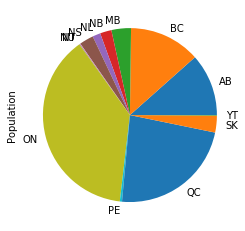

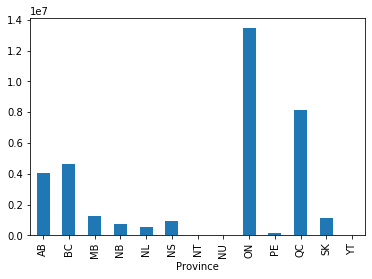

In [24]:
# Your code here
df.groupby(["Province"])["Population"].sum().plot.pie()
plt.show()
df.groupby(["Province"])["Population"].sum().plot.bar()
plt.show()

df

In [25]:
df

,CDcode,Population,CollegeEducated,PercentOwnHouse,Income,Province
0,1001,270350,24.8,74.1,74676,NL
1,1002,20370,7.5,86.3,60912,NL
2,1003,15560,7.3,86.0,56224,NL
3,1004,20385,10.9,73.7,44282,NL
4,1005,42015,17.0,73.9,62565,NL
...,...,...,...,...,...,...
288,6105,6980,17.7,61.8,104302,NT
289,6106,20090,33.7,56.8,141700,NT
290,6204,18990,17.8,19.3,104896,NU
291,6205,10410,10.0,22.2,93294,NU


### Question 1e

Assuming `CollegeEducated` contains the percentage of College Educated population. Which province has the highest total of individuals with a college education? Which has the
lowest?

In [26]:
def wsum(group, avg_name, weight_name):
 
    d = group[avg_name]
    w = group[weight_name] / 100
    try:
        return (d * w).sum()
    except ZeroDivisionError:
        return 0
    
    

In [27]:
df.groupby(["Province"]).apply(wsum ,  "CollegeEducated" ,"Population").nlargest(1)

Province
ON    4246014.94
dtype: float64

In [28]:
df.groupby(["Province"]).apply(wsum , "Population", "CollegeEducated").nsmallest(1)

Province
NU    5062.63
dtype: float64

### Question 1f

Which province has the highest percent of individuals with a college education? Which has the
lowest?

Hint: Remember to weight this calculation by population! Search with keyword "groupby weighted average pandas", or something similar

In [29]:
# Your code here

def wavg(group, avg_name, weight_name):
 
    d = group[avg_name]
    w = group[weight_name] /100
    try:
        return (d * w).sum()/w.sum()
    except ZeroDivisionError:
        return 0


In [30]:
df.groupby(["Province"]).apply(wavg , "CollegeEducated" ,"Population").nsmallest(3)

Province
NU    14.084379
NL    18.210857
NB    20.168363
dtype: float64

In [31]:
df.groupby(["Province"]).apply(wavg , "CollegeEducated" ,"Population").nlargest(3)

Province
ON    31.572429
YT    30.100000
BC    29.589973
dtype: float64

### Question 1g

What is the census division `CDcode` with the highest median income in each province?

In [32]:
f = {'Income': ['max']}

In [33]:
# Your code here
df.groupby(["Province"]).agg(f)

,Income
,max
Province,
AB,192979
BC,94002
MB,109483
NB,76290
NL,112768
NS,69522
NT,141700
NU,104896


### Question 1h

By province, what is the total population of census areas where more than 80 percent of the population own houses

In [34]:
# Your code here
f2 = { 'Population' : ['sum'] }
# Your code here

df.loc[(df['PercentOwnHouse'] > 80), ].groupby(["Province"]).agg(f2)

,Population
,sum
Province,
AB,122155
BC,31445
MB,220595
NB,133995
NL,121425
NS,68585
ON,2915560
PE,17160


### Question 1i

By province, what is the median income and average proportion college educated of census areas
where more than 80 percent of the population own houses

In [35]:
f1 = {'Income': ['median'] , 'CollegeEducated' : ['mean'] , 'Population' : ['sum'] }
# Your code here

df.loc[(df['PercentOwnHouse'] > 80), ].groupby(["Province"]).agg(f1)

,Income,CollegeEducated,Population
,median,mean,sum
Province,,,
AB,82013,10.200000,122155
BC,59721,16.000000,31445
MB,80718,16.400000,220595
NB,61111,17.300000,133995
NL,57183,7.780000,121425
NS,51176,12.116667,68585
ON,70447,19.800000,2915560
PE,57799,14.600000,17160


### Question 1j

Classify the census areas into low, medium, and highly educated based on the college educated,
where “low” is college educated of less than 10 percent, “medium” is between 10 and 20 percent and “high” is more than 20 percent

Based on that classification find the average income weighted by population for each of the low, medium, high education groups. Show the results with `Province` as index and three columns,  `low`, `medium` and `high`.

In [36]:
df2 = df
# Your code here
def high_low_medium(percent):
     if percent < 10: 
        return 'low'
     elif percent > 20 :
        return 'high'
     else:
            return 'medium'
 
def wincome(group, avg_name, weight_name):
 
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum()/w.sum()
    except ZeroDivisionError:
        return 0

df2       
df2['class'] =  df2["CollegeEducated"].apply(lambda x: high_low_medium(x))
df3 = df2.groupby(["Province" , "class"]).apply(wincome , "Income" ,"Population")
df3 = pd.DataFrame(df3)
df3 = df3.round(1)
df3 = df3.reset_index()
df3.pivot(index = "Province" , columns = "class")

0                   
class         high      low    medium
Province                             
AB         99025.2  86573.8   84167.2
BC         71526.5  89527.0   67909.9
MB         69242.6  46299.3   69069.3
NB         66113.5  48539.0   54605.7
NL         74676.0  56696.0   69054.3
NS         67850.9  54562.8   54555.6
NT        141700.0  84864.0   92037.6
NU             NaN  77397.0  100787.9
ON         78038.6      NaN   68615.9
PE         63770.0      NaN   58084.1
QC         62344.6  55579.0   59606.3
SK         82227.2  52685.0   69589.1
YT         84521.0      NaN       NaN

In [37]:
import pandas as pd

## Quesiton 2: WEO debt and deficits 

We see one of the examples from this data set in a previous homework. The problem in this example is that variables run across rows, rather than down columns.  Our **want** is to flip some of the rows and columns so that we can plot the data against time.  The question is how.

We use a small subset of the IMF's [World Economic Outlook database](https://www.imf.org/external/ns/cs.aspx?id=28) that contains two variables and three countries.  

In [38]:
weo = pd.read_csv("https://raw.githubusercontent.com/BUSN32100/data_files/master/WEO.csv")

### question 2a:

Use `df.set_index()` to push all the descriptive, non-numerical columns into the index, leaving the dataframe itself with only numbers


In [39]:
weo

,ISO,Variable,Country,Description,Units,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,ARG,Surplus,Argentina,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,-0.056,0.242,-2.434,-1.272,-2.552,-2.802,-3.001,-3.990,-6.630,-7.123
1,ARG,Debt,Argentina,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,50.842,43.853,53.828,42.624,38.063,39.434,42.195,43.587,52.131,51.751
2,DEU,Surplus,Germany,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,0.187,-0.177,-3.235,-4.221,-0.957,-0.050,-0.203,0.278,0.745,0.129
3,DEU,Debt,Germany,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,63.542,64.926,72.430,81.004,78.311,79.516,77.058,74.480,70.988,68.169
4,GRC,Surplus,Greece,General government net lending/borrowing,Percent of GDP,-2.774,-7.847,-6.092,-6.847,-7.976,...,-6.707,-10.168,-15.152,-11.208,-10.243,-6.506,-3.531,-4.054,-3.080,-3.359
5,GRC,Debt,Greece,General government gross debt,Percent of GDP,22.526,26.681,29.310,33.591,40.061,...,103.103,109.416,126.745,146.250,172.096,159.565,177.677,180.063,176.938,183.436


In [40]:
weo = weo.set_index( ["ISO", "Variable" , "Country","Description" ,"Units" ])

### question 2b:

1. the `reset_index` method to move the `Units` level of the index to a column of the dataframe.
1. Use the `drop` parameter of `reset_index` to delete `Units` from the dataframe.  

In [41]:
weo = weo.reset_index(["Units"] , drop = True)

In [42]:

weo

1980  \
ISO Variable Country   Description                                        
ARG Surplus  Argentina General government net lending/borrowing     NaN   
    Debt     Argentina General government gross debt                NaN   
DEU Surplus  Germany   General government net lending/borrowing     NaN   
    Debt     Germany   General government gross debt                NaN   
GRC Surplus  Greece    General government net lending/borrowing  -2.774   
    Debt     Greece    General government gross debt             22.526   

                                                                   1981  \
ISO Variable Country   Description                                        
ARG Surplus  Argentina General government net lending/borrowing     NaN   
    Debt     Argentina General government gross debt                NaN   
DEU Surplus  Germany   General government net lending/borrowing     NaN   
    Debt     Germany   General government gross debt                NaN   
GRC Surplus  Greece    General government net lending/borrowing  -7.847   
    Debt     Greece    General government gross debt             26.681   

                                                                   1982  \
ISO Variable Country   Description                                        
ARG Surplus  Argentina General government net lending/borrowing     NaN   
    Debt     Argentina General government gross debt                NaN   
DEU Surplus  Germany   General government net lending/borrowing     NaN   
    Debt     Germany   General government gross debt                NaN   
GRC Surplus  Greece    General government net lending/borrowing  -6.092   
    Debt     Greece    General government gross debt             29.310   

                                                                   1983  \
ISO Variable Country   Description                                        
ARG Surplus  Argentina General government net lending/borrowing     NaN   
    Debt     Argentina General government gross debt                NaN   
DEU Surplus  Germany   General government net lending/borrowing     NaN   
    Debt     Germany   General government gross debt                NaN   
GRC Surplus  Greece    General government net lending/borrowing  -6.847   
    Debt     Greece    General government gross debt             33.591   

                                                                   1984  \
ISO Variable Country   Description                                        
ARG Surplus  Argentina General government net lending/borrowing     NaN   
    Debt     Argentina General government gross debt                NaN   
DEU Surplus  Germany   General government net lending/borrowing     NaN   
    Debt     Germany   General government gross debt                NaN   
GRC Surplus  Greece    General government net lending/borrowing  -7.976   
    Debt     Greece    General government gross debt             40.061   

                                                                   1985  \
ISO Variable Country   Description                                        
ARG Surplus  Argentina General government net lending/borrowing     NaN   
    Debt     Argentina General government gross debt                NaN   
DEU Surplus  Germany   General government net lending/borrowing     NaN   
    Debt     Germany   General government gross debt                NaN   
GRC Surplus  Greece    General government net lending/borrowing -10.603   
    Debt     Greece    General government gross debt             46.621   

                                                                   1986  \
ISO Variable Country   Description                                        
ARG Surplus  Argentina General government net lending/borrowing     NaN   
    Debt     Argentina General government gross debt                NaN   
DEU Surplus  Germany   General government net lending/borrowing     NaN   
    Debt     Germany   General government gross debt                NaN   
GRC Surplus

### Question 2c:

1. Transpose the data frame 
1. Construct a line plot of `Debt` over time with one line for each country.  

Hint:  You will need to plot with ax = df.plot() in order to set the legend

In [43]:
weo = weo.T

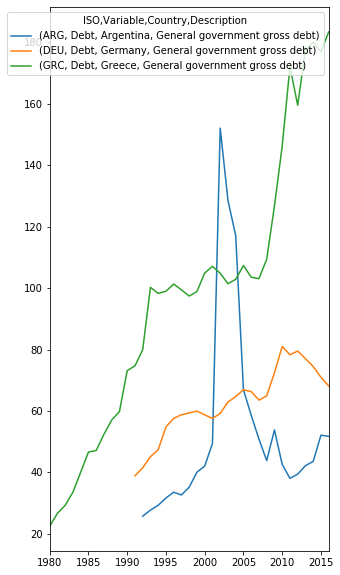

In [44]:
import pandas as pd

weo.loc(axis=1)[ :, 'Debt', :, :].plot(kind='line', figsize=(5,10))

#df = weo.loc[[:],["Debt"],[:],[]:]]
#weo[weo.index["Variable" = "Debt"]].plot(kind='line', figsize=(5,10))

#### 

### Question 2d:

1. Swap the `Country` to be the outer most column level using `df.swaplevel(0, 1, axis=1)`
1. Construct another line plot of Argentina for both Debt and Surplus
1. Shorten the legend with `ax.legend` to just the Variable name


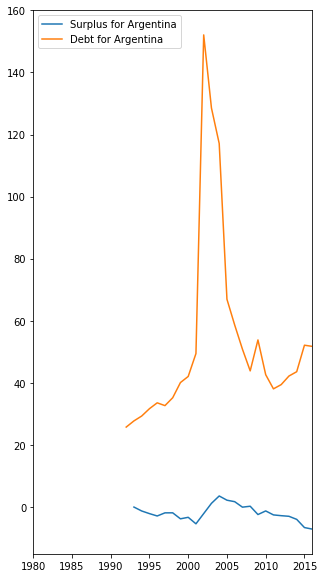

In [45]:
df = weo.loc(axis=1)[ :, :, :, :]
df = df.swaplevel(0, 2, axis=1)
ax = df.loc(axis=1)[ 'Argentina', :, :, :].plot(kind='line', figsize=(5,10))
ax.legend([ 'Surplus for Argentina' ,'Debt for Argentina'])